In [7]:
from pandas_profiling import ProfileReport
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 200)
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as seabornInstance

In [8]:
df_train = pd.read_csv(r'C:\\Users\\wellington.nogueira\\Documents\\Desafio CodeNation\\dataset\\train.csv', index_col=False)
df_test = pd.read_csv(r'C:\\Users\\wellington.nogueira\\Documents\\Desafio CodeNation\\dataset\\test.csv', index_col=False)

In [9]:
df_train.shape

(13730, 167)

In [10]:
df_train.dropna(subset = ["NU_NOTA_MT"], inplace=True)
df_train_target = df_train["NU_NOTA_MT"]

In [11]:
b = df_test.columns
a = df_train.columns
columns = [a for a in b]
df_train_features = df_train[columns]

In [12]:
df_train_features.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,E,E,C,B,B,A,NaN,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,E,D,C,B,B,C,E,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,G,F,L,B,B,A,NaN,D


In [13]:
column_with_nan = df_train_features.columns[df_train_features.isnull().any()]
for column in column_with_nan:
    percnt_na = ((df_train_features[column].isnull().sum())/(len(df_train_features)))*100
    if percnt_na > 20:
        print(column)
        df_train_features = df_train_features.drop(column,axis = 1)

TP_ENSINO
TP_DEPENDENCIA_ADM_ESC
Q027


In [14]:
# Create correlation matrix
corr_matrix = df_train_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df_train_features.drop(to_drop, axis=1, inplace=True)
to_drop

['TP_PRESENCA_CH', 'NU_NOTA_REDACAO']

In [15]:
df_train_features.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,D,D,C,A,A,C,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,A,A,B,A,A,A,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,E,E,C,B,B,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,E,D,C,B,B,C,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,G,F,L,B,B,A,D


In [16]:
df_train_features.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,D,D,C,A,A,C,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,A,A,B,A,A,A,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,E,E,C,B,B,A,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,E,D,C,B,B,C,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,G,F,L,B,B,A,D


In [17]:
categorical_col = ["CO_UF_RESIDENCIA","TP_COR_RACA", "TP_NACIONALIDADE","TP_ST_CONCLUSAO","TP_ANO_CONCLUIU","TP_ESCOLA",
                        "IN_TREINEIRO","IN_BAIXA_VISAO","IN_CEGUEIRA","IN_SURDEZ","IN_DISLEXIA","IN_DISCALCULIA","IN_SABATISTA",
                          "IN_GESTANTE","IN_IDOSO","TP_PRESENCA_CN","TP_LINGUA","TP_STATUS_REDACAO"]

In [18]:
df_train_features[categorical_col] = df_train_features[categorical_col].astype(object)

In [19]:
no_numerical_columns = df_train_features.select_dtypes(exclude='number')
numerical_columns = df_train_features.select_dtypes(include='number')

In [20]:
no_numerical_columns.drop("NU_INSCRICAO",inplace=True, axis = 1)

C:\Users\wellington.nogueira\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
numerical_columns.head()

,NU_IDADE,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,24,1,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0
1,17,1,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0
5,18,1,439.7,583.2,410.9,120.0,120.0,120.0,160.0,100.0
6,18,1,420.1,604.2,484.5,100.0,120.0,120.0,120.0,100.0
7,18,1,619.6,625.8,611.2,140.0,120.0,120.0,120.0,120.0


In [22]:
no_numerical_columns.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,43,RS,M,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,1,1,D,D,C,A,A,C,A
1,23,CE,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,1,1,A,A,B,A,A,A,A
5,29,BA,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,0,1,E,E,C,B,B,A,A
6,51,MT,F,3,1,2,0,2,0,0,0,0,0,0,0,0,0,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,0,1,E,D,C,B,B,C,A
7,43,RS,F,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,0,1,G,F,L,B,B,A,D


In [23]:
train_dummies = pd.get_dummies(no_numerical_columns)
train_dummies.head()

,CO_UF_RESIDENCIA_11,CO_UF_RESIDENCIA_12,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,CO_UF_RESIDENCIA_24,CO_UF_RESIDENCIA_25,CO_UF_RESIDENCIA_26,CO_UF_RESIDENCIA_27,CO_UF_RESIDENCIA_28,CO_UF_RESIDENCIA_29,CO_UF_RESIDENCIA_31,CO_UF_RESIDENCIA_32,CO_UF_RESIDENCIA_33,CO_UF_RESIDENCIA_35,CO_UF_RESIDENCIA_41,CO_UF_RESIDENCIA_42,CO_UF_RESIDENCIA_43,CO_UF_RESIDENCIA_50,CO_UF_RESIDENCIA_51,CO_UF_RESIDENCIA_52,CO_UF_RESIDENCIA_53,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ANO_CONCLUIU_0,TP_ANO_CONCLUIU_1,TP_ANO_CONCLUIU_2,TP_ANO_CONCLUIU_3,TP_ANO_CONCLUIU_4,TP_ANO_CONCLUIU_5,TP_ANO_CONCLUIU_6,TP_ANO_CONCLUIU_7,TP_ANO_CONCLUIU_8,TP_ANO_CONCLUIU_9,TP_ANO_CONCLUIU_10,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,TP_ESCOLA_4,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_CEGUEIRA_0,IN_SURDEZ_0,IN_SURDEZ_1,IN_DISLEXIA_0,IN_DISLEXIA_1,IN_DISCALCULIA_0,IN_DISCALCULIA_1,IN_SABATISTA_0,IN_SABATISTA_1,IN_GESTANTE_0,IN_GESTANTE_1,IN_IDOSO_0,IN_IDOSO_1,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,TP_PRESENCA_CN_2,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.

In [24]:
numerical_columns.fillna(numerical_columns.mean(),inplace = True)

C:\Users\wellington.nogueira\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
train_dummies.fillna(train_dummies.median(),inplace = True)

In [427]:
train_df = pd.concat([train_dummies, numerical_columns], axis=1)

In [28]:
numerical_columns.columns

Index(['NU_IDADE', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5'],
      dtype='object')

In [459]:
train_df.shape

(10133, 211)

In [429]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(train_df,df_train_target,test_size=0.30,random_state=0)

In [430]:
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [378]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [520]:
y_pred = regressor.predict(X_test)

In [521]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.tail(25)
df1

,Actual,Predicted
10974,447.0,429.163
13602,397.4,430.246
5945,513.4,470.905
7879,360.6,421.423
3001,392.5,406.518
11939,433.7,445.749
5092,433.6,440.816
13587,483.9,448.239
8040,461.2,430.347
9549,387.4,413.322


In [494]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 59.4161980263158
Mean Squared Error: 5770.5460152618425
Root Mean Squared Error: 75.96411004719164


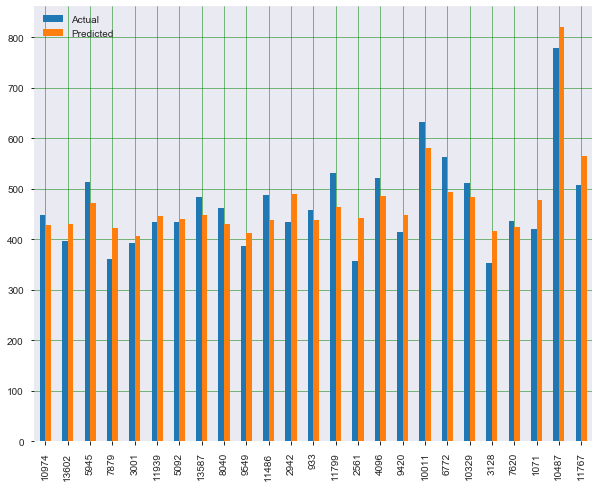

In [434]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [547]:
a = numerical_columns.columns
b = no_numerical_columns.columns
total = X_test.columns

In [549]:
NUMDF = df_test[a]
CATDF = df_test[b]

categorical_col = ["CO_UF_RESIDENCIA","TP_COR_RACA", "TP_NACIONALIDADE","TP_ST_CONCLUSAO","TP_ANO_CONCLUIU","TP_ESCOLA",
                        "IN_TREINEIRO","IN_BAIXA_VISAO","IN_CEGUEIRA","IN_SURDEZ","IN_DISLEXIA","IN_DISCALCULIA","IN_SABATISTA",
                          "IN_GESTANTE","IN_IDOSO","TP_PRESENCA_CN","TP_LINGUA","TP_STATUS_REDACAO"]


CATDF[categorical_col] = CATDF[categorical_col].astype(object)

In [550]:
CATDF = pd.get_dummies(CATDF)

In [551]:
train_df = pd.concat([NUMDF, CATDF], axis=1)

In [552]:
train_df.head()

,NU_IDADE,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,CO_UF_RESIDENCIA_11,CO_UF_RESIDENCIA_12,CO_UF_RESIDENCIA_13,CO_UF_RESIDENCIA_14,CO_UF_RESIDENCIA_15,CO_UF_RESIDENCIA_16,CO_UF_RESIDENCIA_17,CO_UF_RESIDENCIA_21,CO_UF_RESIDENCIA_22,CO_UF_RESIDENCIA_23,CO_UF_RESIDENCIA_24,CO_UF_RESIDENCIA_25,CO_UF_RESIDENCIA_26,CO_UF_RESIDENCIA_27,CO_UF_RESIDENCIA_28,CO_UF_RESIDENCIA_29,CO_UF_RESIDENCIA_31,CO_UF_RESIDENCIA_32,CO_UF_RESIDENCIA_33,CO_UF_RESIDENCIA_35,CO_UF_RESIDENCIA_41,CO_UF_RESIDENCIA_42,CO_UF_RESIDENCIA_43,CO_UF_RESIDENCIA_50,CO_UF_RESIDENCIA_51,CO_UF_RESIDENCIA_52,CO_UF_RESIDENCIA_53,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,TP_NACIONALIDADE_4,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ANO_CONCLUIU_0,TP_ANO_CONCLUIU_1,TP_ANO_CONCLUIU_2,TP_ANO_CONCLUIU_3,TP_ANO_CONCLUIU_4,TP_ANO_CONCLUIU_5,TP_ANO_CONCLUIU_6,TP_ANO_CONCLUIU_7,TP_ANO_CONCLUIU_8,TP_ANO_CONCLUIU_9,TP_ANO_CONCLUIU_10,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,IN_BAIXA_VISAO_0,IN_BAIXA_VISAO_1,IN_CEGUEIRA_0,IN_SURDEZ_0,IN_SURDEZ_1,IN_DISLEXIA_0,IN_DISCALCULIA_0,IN_SABATISTA_0,IN_SABATISTA_1,IN_GESTANTE_0,IN_GESTANTE_1,IN_IDOSO_0,TP_PRESENCA_CN_0,TP_PRESENCA_CN_1,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATU

In [554]:
b = total
a = train_df.columns
columns = [x for x in b if x not in a]
columns

['TP_ESCOLA_4',
 'IN_DISLEXIA_1',
 'IN_DISCALCULIA_1',
 'IN_IDOSO_1',
 'TP_PRESENCA_CN_2',
 'CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0',
 'CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee']

In [555]:
train_df['TP_ESCOLA_4'] = 0
train_df['IN_DISLEXIA_1'] = 0
train_df['IN_DISCALCULIA_1'] = 0
train_df['IN_IDOSO_1'] = 0
train_df['TP_PRESENCA_CN_2'] = 0
train_df['CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0'] = 0
train_df['CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee'] = 0

In [580]:
train_df.shape

(4576, 211)

In [559]:
train_df.fillna(0,inplace = True)

In [560]:
y_pred = regressor.predict(train_df)

In [593]:
dfFinal = pd.DataFrame()
dfFinal = dfFinal[:-1].tail()

In [594]:
dfFinal["NU_INSCRICAO"] = df_test["NU_INSCRICAO"]

In [595]:
dfFinal["NU_NOTA_MT"] = y_pred

In [597]:
dfFinal.to_csv("asnwer.csv",index=False)